# Deelving into worldwide civil resistance campaings

---

> Dimitrios Kokkotas, 8200076 <br />
> Dept of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> dtmkokkotas@gmail.com

* The current notebook examines both violent and non-violent major civil resistance campaigns, being <br>launched from 1900 onwards on a worldwide scale
* Essentially, we replicate some indicative findings, uncovered by Erica Chenoweth and Maria J. Stephan
* The aforementioned insights are introduced in [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw)
* You may familiarize yourself with the studie's key concepts, by accessing the corresponding [TEDx Talk](https://www.youtube.com/watch?v=YJSehRlU34w)
<br> <br>
* The data are collected from [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX), with them being peer-reviewed and deriving from multiple sources
* There are more recent published versions, as the research continues, following up to
    - the increase in the rise of resistance campaings, and
    - the need for some adjustments
* Overviewing the respective [codebook](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/0UZOTX/B4RH7S&version=2.0), is highly recommended, in order to gain a solid understanding of the data inspected<br> as well be aware of standards & assumptions made.
* We are also making use of data gathered in the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls), available from the [Polity Project](https://www.systemicpeace.org/polityproject.html)

## Some clarifications on the broader context of the research

With the campaigns being our unit of analysis, it should be definitely useful to provide a comprehensive definition. <br>As [Erica Chenoweth](https://www.ericachenoweth.com/) states in [Online Methodological Appendix Accompanying](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/0UZOTX/B4RH7S&version=2.0) : <br><br> "We define a campaign as a series of <b>observable, continuous, purposive mass</b> tactics or events in pursuit of a political objective."

Additionally, before stepping into the technical aspects, we shall highlight some important inclusion criteria in reference to<br> the campaigns, as declared in the [Online Methodological Appendix Accompanying](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/0UZOTX/B4RH7S&version=2.0).<br>
<br>Subtantially, the campaigns had to satisfy a set of conditions in terms of objectives and membership, to be finally registered into the dataset. <br> <br>In particular:

* Instances of campaigns are included, when the objective was maximalist rather than limited:
        <br><br>
    - foreign occupation expulsion 
    - regime change
    - self-determination etc.
    <br><br>
* The total number of active participants in a campaign must be at least 1000, so the campaign could be included

## Importing the needed packages
<br>
At first, we import several libraries, with them serving analysis, visualization and statistics models' estimation needs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

%matplotlib inline

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None # disable the display of unwanted warning messages
pd.set_option('display.max_columns', None) # display the maximum number of columns without trunctation

## Reading our data
<br>
Our next step is to obtain and load the provided files, with them being stored under the `data` folder in different formats.

* `NAVCO-1.2-updated.xlsx` : embodies information regarding multiple campaigns
* `polity.csv`: coding the authority characteristics of states in the world system

In [3]:
campaigns = pd.read_excel('data/NAVCO-1.2-updated.xlsx')

<br>We inspect 389 maximalist campaigns, each of those holding values for 25 variables/features, most of them being in binary form.<br><br>

In [4]:
campaigns.shape

(389, 25)

<br>The campaigns are set on from 1945-2013, storing outcomes through 2014.<br><br>

In [5]:
(campaigns.BYEAR.min(),campaigns.EYEAR.max())

(1945, 2014)

<br>How a single campaign record looks like?<br><br>

In [6]:
campaigns.sample()

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
181,269,Second Revolution,Kyrgyzstan,2010,2010,Kyrgyz president Kurmanbek Bakiyev,1,0,0,0,1,0,1,0,0,0,14,2000.0,0.000367,1,0,1.0,0.0,0,0


<br>We receive useful information such as the location, timeframe, outcome, tactics adopted and many more explanatory features for each case.<br>

By exploring and profiling further records, we surely gain a better understanding of our data.<br><br>

In [7]:
campaigns.iloc[-3:]

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
386,12,anti-Chiluba campaign,Zambia,2001,2001,Chiluba regime,1,0,0,0,1,0,1,0,0,0,213,3000.0,0.000277,0,0,0.0,0.0,0,0
387,250,Zimbabwe African People's Union,Zimbabwe,1972,1979,Smith/Muzorena regime,0,1,0,0,0,1,1,0,0,0,2556,1000.0,0.000145,1,0,NaN,0.0,1,0
388,161,PF-ZAPU guerillas,Zimbabwe,1983,1987,Mugabe regime,0,1,0,0,0,1,1,0,0,0,1821,5000.0,0.000542,1,0,NaN,0.0,0,0


## Cleaning our data
<br>Since data preprocessing is a crucial part of our analysis, let's examine whether cleaning actions should be performed.

### Are there any missing values?

* We start by handling, if that's the case, missing values (represented as `NaN`) in our dataset.
* At first, we remove rows from the Dataframe where all values in the row are missing (NaN)

In [8]:
campaigns.dropna(how='all', inplace=True)

In [9]:
campaigns.isna().sum()

NAVCO ID                              0
CAMPAIGN                              0
LOCATION                              0
BYEAR                                 0
EYEAR                                 0
TARGET                                0
SUCCESS                               0
LIMITED                               0
FAILURE                               0
ONGOING                               0
NONVIOL                               0
VIOL                                  0
REGCHANGE                             0
FSELFDET                              0
SECESSION                             0
OTHER                                 0
DURATION                              0
PARTICIPATION                         9
PERCENTAGE POPULAR PARTICIPATION      0
REGVIOL                               0
DEFECT                                0
VIOLENT FLANK                       212
VIOLSIM                               1
REGAID                                0
STATESUP                              0


* The majority of our data is complete
* We focus on the `VIOLENT FLANK` , where there are multiple missing values
* Violent Flank, as declared within the data dictionary, determines whether individuals within<br> a nonviolent movement have initiated violent actions, even as the larger campaign remains predominantly nonviolent 
* The violent flank is coded for non violent campaigns only
* That being the case, the aforementioned missing values refer to the 220 instances of violent campaigns
* However, what seems to be unreasonable is the existence of records storing values for violent flank,<br> even when the campaign is marked as a violent one
* So we proceed by replacing the last values with NaN

In [10]:
campaigns.loc[(campaigns.VIOL == 1) & (campaigns['VIOLENT FLANK'].\
                                       notna()), 'VIOLENT FLANK'] = np.nan

At this point, we should note that keeping and not filling NaN in the specific case is rational, since those NaN are corresponding to violent<br> campaigns, and as mentioned earlier violent flank provides information only for non violent ones.

Moving forward, we inspect the missing values of `PARTICIPATION` column.

In [11]:
campaigns.loc[campaigns.PARTICIPATION.isna()].tail()

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
79,64,Czech uprising,Czechoslovakia,1968,1968,Soviet occupation,0,0,1,0,1,0,0,1,0,0,228,NaN,0.0,1,0,0.0,0.0,0,0
81,409,CNL,Democratic Republic of Congo,1964,1965,Mobutu regime,0,0,1,0,0,1,1,0,0,0,631,NaN,0.0,1,0,NaN,0.0,1,1
138,355,Telangana People's Front,India,1948,1952,Indian government,0,0,1,0,0,1,1,0,0,0,1506,NaN,0.0,1,0,NaN,1.0,0,1
190,395,Hundred Day War,Lebanon,1978,1978,Syrian occupation,1,0,0,0,0,1,0,1,0,0,255,NaN,0.0,1,0,NaN,1.0,1,0
232,276,Anti-Somoza Strike,Nicaragua,1978,1978,Somoza regime,0,0,1,0,1,0,1,0,0,0,244,NaN,0.0,1,0,1.0,0.0,0,0


<br>Since, for each and every one missing value of `PARTICIPATION` variable the corresponding value of the<br>`PERCENTAGE POPULAR PARTICIPATION` variable is equal to 0.0, we fill the NaN values of the former to 0.0 accordingly.<br><br>

In [12]:
campaigns.PARTICIPATION.fillna(0.0, inplace=True)

### Are there any duplicate records?

Moving on, we shall take into consideration the presence of duplicate rows within our dataset.

In [13]:
len(campaigns[campaigns.duplicated()]) == 0

True

* Our dataframe doesn't hold any duplicate records
* Deelving into, we examine the `NAVCO ID` feature
* We may expect the identifier to be unique for each campaign
* However, that is not the case for our dataset

In [14]:
campaigns[campaigns.duplicated(subset='NAVCO ID', keep=False)].head(4)

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
91,230,Freitilin,East Timor,1975,1979,Indonesian occupation,0,0,1,0,0,1,0,1,0,0,1414,30000.0,0.000208,1,0,NaN,1.0,0,0
92,230,Timorese resistance,East Timor,1989,1999,Indonesian occupation,1,0,0,0,1,0,0,1,0,0,3640,6000.0,0.006950,1,1,1.0,0.0,0,1
100,191,El Salvador anti-junta,El Salvador,1977,1980,Mil/civ junta,0,0,1,0,1,0,1,0,0,0,1375,10500.0,0.002300,1,0,1.0,0.0,1,0
101,191,Farabundo Marti National Liberation Front (FMLN),El Salvador,1979,1991,El Salvador government,0,1,0,0,0,1,1,0,0,0,4523,6000.0,0.001126,1,1,NaN,1.0,1,0


* We observe that multiple campaigns are identified by the same code
* Why that happens? Are there any cleaning operation that must be performed?
* As explicitly stated within the codebook, we come across some cases, where campaigns entered into different<br> phases (i.e. from nonviolent to violent or the reverse), were split into two campaigns but share a NAVCO ID
* Thus, no further cleaning activity in terms of duplicate records, should be taken

### A brief overview of statistic measures
* Proceeding, we gauge various summary statistics of the `PARTICIPATION` column, in order to unveil some useful insights
* Using the `describe()` method, serves the same purpose

In [15]:
campaigns['PARTICIPATION'].agg(['size', 'min', 'max', 'median', 'mean', 'std']).\
    reset_index().\
    rename(columns={'index': 'measures', 'PARTICIPATION': 'sizes'})

,measures,sizes
0,size,3.890000e+02
1,min,0.000000e+00
2,max,1.400000e+07
3,median,1.300000e+04
4,mean,1.653791e+05
5,std,8.804579e+05


* Regarding the central tendency, we notice that the mean is higher than the median
* That indicates the possible presence of high values (outliers) that are pulling the mean upwards
* At the moment, we are not removing any outliers, as they do not significantly affect our analysis
* Later, when conducting the needed regression analysis we shall consider removing records, such<br> as the ones holding zero values in reference to the participation
* One could apply methods such as Z-Score, the Interquartile Range (IQR) etc. to detect and handle properly outliers

### A noteworthy annotation

* Using the `dtypes` attribute of the dataframe, we observe that both `VIOLSIM` and `VIOLENT FLANK` variables  are of type `float64`
* Meanwhile, all other binary variables, such as `VIOL` and `NONVIOL` etc. are of type `int64`
* Initially, we could suggest altering the type to be casted to `int64`, so we can ensure format consistency
* However, both `VIOLSIM` and `VIOLENT FLANK` variables keep NaN
* As mentioned in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) :<br> "Because NaN is a float, this forces an array of integers with any missing values to become floating point"
* One could provide a solution, by using [Nullable integer data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html)
* Since it seems to be a minor issue, we keep it as it is

In [16]:
campaigns[['VIOLENT FLANK', 'VIOLSIM']].dtypes

VIOLENT FLANK    float64
VIOLSIM          float64
dtype: object

## Visualizing insightful findings

* Our first task is to create a plot showing the frequency of nonviolent and violent campaigns
* As required, the frequency should be counted based on their end years, at decades
* Lastly, the violent and nonviolent campaign counts should be stacked on each other

First and foremost, we create a new column, storing the decade in which each and every campaign occurred.
<br>For that purpose we use the `EYEAR` variable, and calculate a simple floor division.

In [17]:
campaigns['Decade'] = (campaigns['EYEAR'] // 10) * 10
campaigns[['CAMPAIGN', 'Decade']].iloc[2:4]

,CAMPAIGN,Decade
2,Taliban/anti-government forces,1990
3,Taliban,2010


We are aware that the binary variable `VIOL` is equal to:
* `0`, when the campaign is not violent (`NONVIOL` will be equal to 1) and
* `1`, when the campaign is highlighted as a violent one (`NONVIOL` will be equal to 0)

We then create a groupby object, that stores for each decade the number of violent and nonviolent campaigns.
<br> <br>A further action is being implemented via the `unstack()` method, which returns a DataFrame having a new level<br> of column labels whose inner-most level consists of the pivoted index labels.

In [18]:
violence_per_decade = campaigns.groupby(['Decade', 'VIOL'])['VIOL'].\
    count().unstack()
violence_per_decade.sample(2)

VIOL,0,1
Decade,,
1940,2,12
1960,8,21


For the needs of the vizualization, we also count the total number of campaigns for each decade

In [19]:
campaigns_per_decade = violence_per_decade[1].values + violence_per_decade[0].values

Time for visualization!

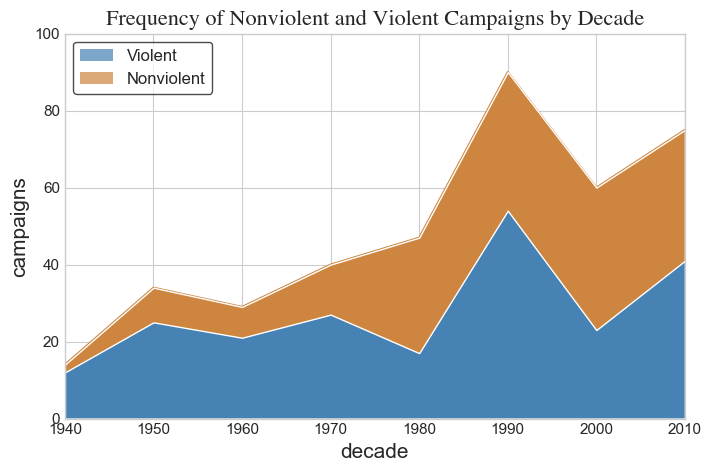

In [20]:
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(8, 5))

plt.plot(violence_per_decade.index, violence_per_decade[1].values,\
         label='Violent', color='steelblue')

plt.plot(violence_per_decade.index, campaigns_per_decade,\
         label='NonViolent', color='peru')


# Fill the area between the lines with the respective colors
plt.fill_between(violence_per_decade.index, campaigns_per_decade,\
         color='peru', edgecolor='white',\
         alpha=1, label='NonViolent', zorder=2)

plt.fill_between(violence_per_decade.index, violence_per_decade[1].values,\
        color='steelblue', edgecolor='white', linewidth=1,alpha=1,\
        label='Violent', zorder=2)
frameon=True

# Set plot labels and title
plt.xlabel('decade', fontsize=15)
plt.ylabel('campaigns', fontsize=15)
plt.title('Frequency of Nonviolent and Violent Campaigns by Decade',\
        fontname='Times', fontsize=16)


custom_legend_handles = [
    Rectangle((0, 0), 1, 1, color='steelblue', linewidth=0, alpha=0.7),
    Rectangle((0, 0), 1, 1, color='peru', linewidth=0, alpha=0.7),
]

# Show legend with custom handles
plt.legend(custom_legend_handles, ['Violent', 'Nonviolent'],\
           loc='upper left', prop={'family': 'Arial', 'size': 12},\
           frameon=True, fancybox=True, edgecolor='black', framealpha=0.7)

plt.xticks(size=11)
plt.yticks(size=11)

plt.ylim(0, max(campaigns_per_decade + 10))
                 
plt.xlim(violence_per_decade.index[0], violence_per_decade.index[-1])

plt.show()

Observing the diagram, it becomes apparent that there is a noticeable increase of the launched campaigns, particularly when scrutinizing data from the 1980s and 1990s.

* Moving on, we are asked to create a plot showing, for each decade from 1940 onwards:
    - the number of nonviolent campaigns and
    - the percentage of success
* Our plot will have two vertical axes, one for each of the metrics

Since we do not keep data earlier than 1940, there is no need for some date filtering

In [21]:
campaigns.Decade.min()

1940

We then perform the necessary operations to gauge the needed metrics

In [22]:
nonviolent_campaigns = campaigns.loc[campaigns['NONVIOL'] == 1]

nonviolent_per_decade = nonviolent_campaigns.groupby('Decade').size().\
    reset_index(name='NumOfNonviolent')

In [23]:
success_percentage = nonviolent_campaigns.groupby('Decade')['SUCCESS'].\
    mean().reset_index(name='SuccessPercentage')

In [24]:
successful_nonviolent_campaigns = pd.merge(nonviolent_per_decade,\
    success_percentage, on='Decade', how='outer')

In [25]:
successful_nonviolent_campaigns.head(2)

,Decade,NumOfNonviolent,SuccessPercentage
0,1940,2,0.500000
1,1950,9,0.222222


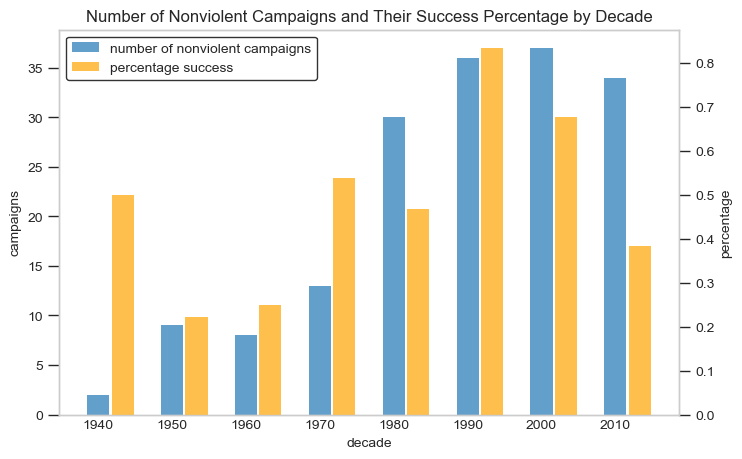

In [26]:
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 3


ax1.bar(successful_nonviolent_campaigns['Decade'],\
    successful_nonviolent_campaigns['NumOfNonviolent'],\
    bar_width, label='number of nonviolent campaigns', alpha=0.7)

ax1.set_xlabel('decade')
ax1.set_ylabel('campaigns')
ax1.tick_params(axis='y', direction='out', length=8, width=1)
ax1.grid(False)

ax2 = ax1.twinx()
ax2.bar(successful_nonviolent_campaigns['Decade'] + bar_width + 0.3,\
    successful_nonviolent_campaigns['SuccessPercentage'], bar_width,\
    label='percentage success', color='orange', alpha=0.7)
ax2.set_ylabel('percentage')
ax2.tick_params(axis='y', direction='out', length=8, width=1 )
ax2.grid(False)

# Combine legends from both axes
bars = ax1.get_legend_handles_labels()[0] + ax2.get_legend_handles_labels()[0]
labels = ax1.get_legend_handles_labels()[1] + ax2.get_legend_handles_labels()[1]
ax1.legend(bars, labels, loc='upper left', frameon=True, edgecolor='black', facecolor='white')

plt.title('Number of Nonviolent Campaigns and Their Success Percentage by Decade')

plt.show()

As observed, the number of nonviolent campaigns increases over time, with the success rates to fluctuate a lot!

* Our next task, is to create a plot showing the success rate for violent and nonviolent campaigns by decade.

In [27]:
violence_success = campaigns.groupby(['Decade', 'NONVIOL'])['SUCCESS'].mean().unstack()
violence_success.sample(2)

NONVIOL,0,1
Decade,,
2000,0.130435,0.675676
1940,0.500000,0.500000


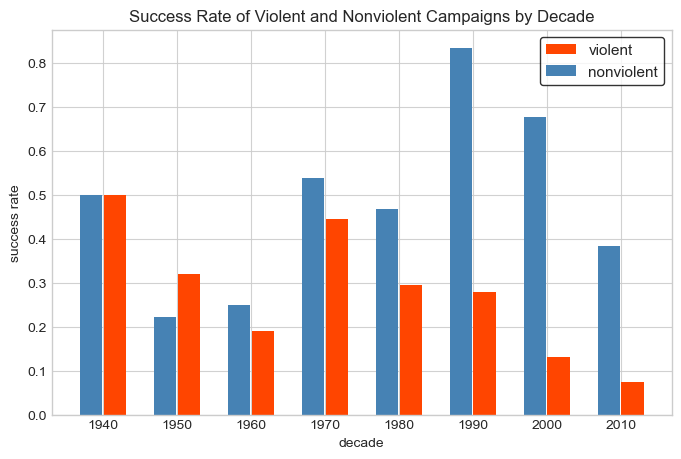

In [28]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 3

decades = violence_success.index


bar1 = ax.bar(decades + bar_width/2 + 0.1, violence_success[0].values,\
        bar_width, label='violent', color='orangered')
bar2 = ax.bar(decades - bar_width/2 -0.1, violence_success[1].values,\
        bar_width, label='nonviolent', color='steelblue')

ax.set_xlabel('decade')
ax.set_ylabel('success rate')
ax.set_title('Success Rate of Violent and Nonviolent Campaigns by Decade')
ax.set_xticks(decades)
ax.legend(loc='upper right', frameon=True, edgecolor='black',\
    facecolor='white', prop={'size': 11})

ax.grid(linestyle='-', alpha=0.9)

plt.show()

Examining the diagram, we can validate that across time, non violent campaigns are significantly more successful than the violent ones

## Which are the largest resistance campaigns?

Going forward, we create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.

In [29]:
filtered_campaigns = campaigns[campaigns['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02]
filtered_campaigns = filtered_campaigns.sort_values(by='PERCENTAGE POPULAR PARTICIPATION',\
                                                    ascending=True).reset_index()

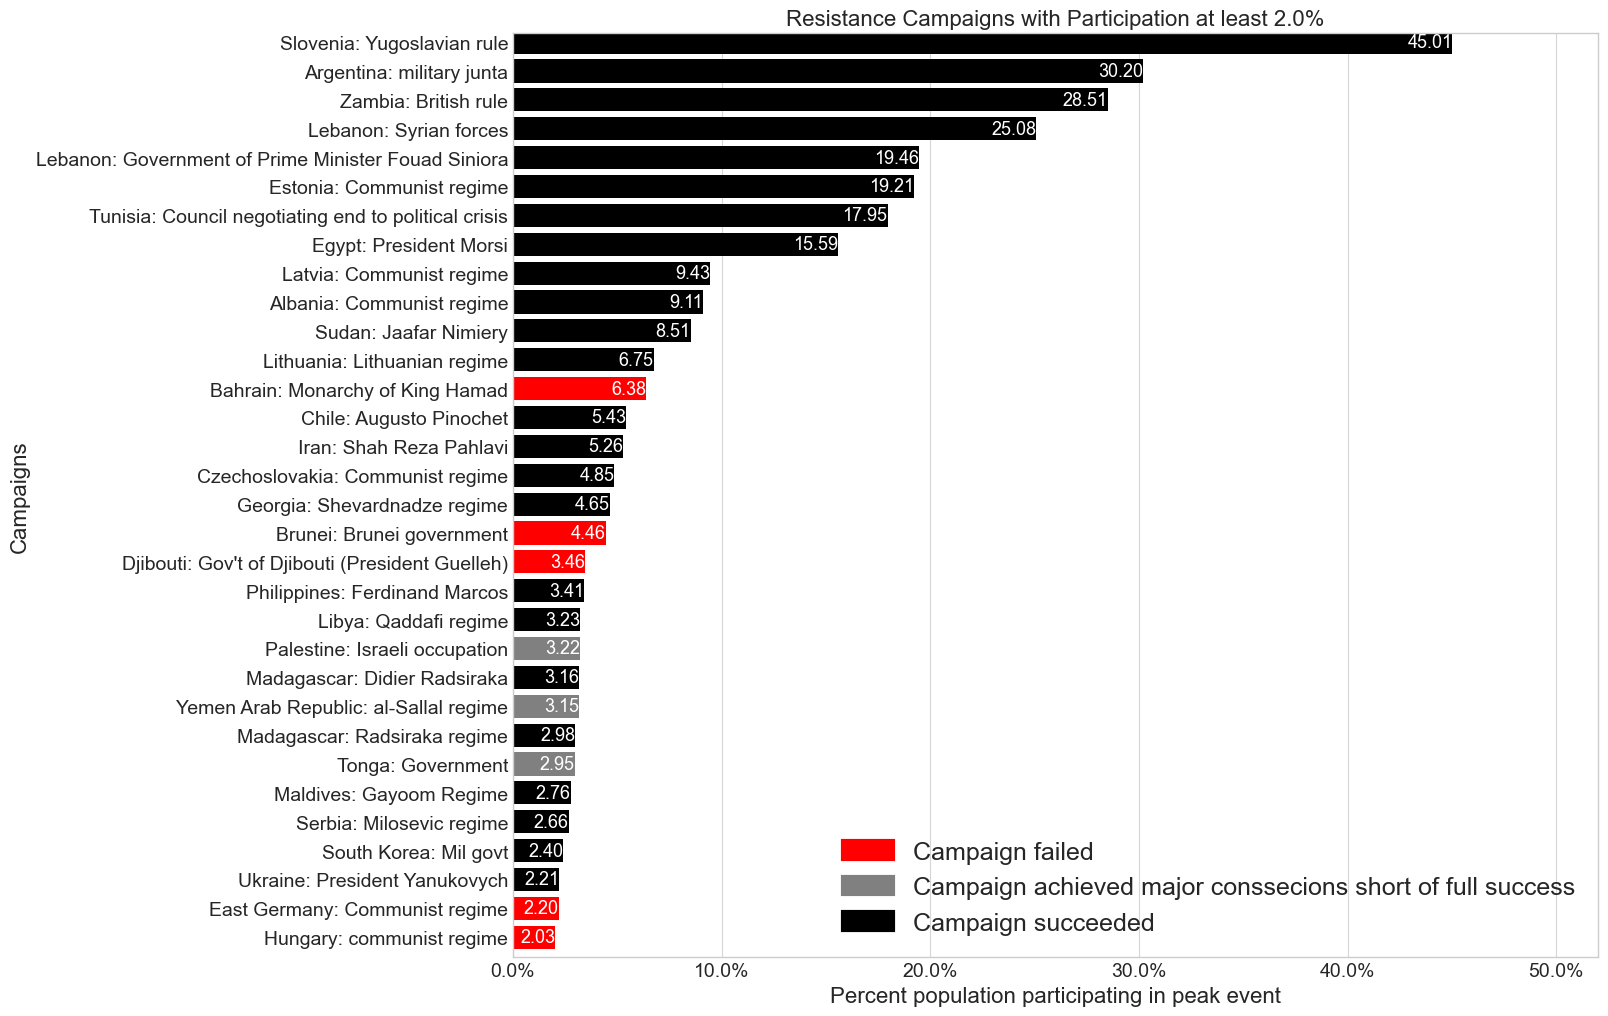

In [30]:
# Color mapping based on SUCCESS, LIMITED, and FAILURE
colors = {'SUCCESS': 'black', 'LIMITED': 'grey', 'FAILURE': 'red'}

# Create a new column 'COLOR' based on the color mapping
filtered_campaigns['COLOR'] = filtered_campaigns.\
    apply(lambda row: colors[row[['SUCCESS', 'LIMITED', 'FAILURE']].idxmax()], axis=1)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plotting
bars = ax.barh(filtered_campaigns.index, filtered_campaigns['PERCENTAGE POPULAR PARTICIPATION'],\
               color=filtered_campaigns['COLOR'])

for bar, value in zip(bars, filtered_campaigns['PERCENTAGE POPULAR PARTICIPATION']):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{value*100:.2f}',\
            ha='right', va='center', fontsize=13, color='white')

# Add labels
ax.set_yticks(filtered_campaigns.index)
ax.set_yticklabels([f"{loc}: {target}" for loc, target in zip(filtered_campaigns['LOCATION'],\
            filtered_campaigns['TARGET'])], fontsize=14)

ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_xticklabels(['0.0%', '10.0%', '20.0%', '30.0%', '40.0%', '50.0%'], fontsize=14)

ax.set_xlabel('Percent population participating in peak event', fontsize=16)
ax.set_ylabel('Campaigns', fontsize=16)
ax.set_title('Resistance Campaigns with Participation at least 2.0%', fontsize=16)


legend_labels = {'SUCCESS': 'Campaign succeeded', 'LIMITED':\
            'Campaign achieved major conssecions short of full success', 'FAILURE': 'Campaign failed'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, linewidth=3) for color in colors.values()][::-1]

legend_labels = list(legend_labels.values())[::-1]


ax.legend(legend_handles, legend_labels, loc='lower right', fontsize=18)


ax.set_ylim(-0.7, len(filtered_campaigns)-0.7)
ax.set_xlim(0, 0.52)

ax.grid(axis='x', linestyle='-', alpha=0.8)
ax.yaxis.grid(False)

plt.show()

* Let's extract information about resistance campaigns in Greece

In [31]:
campaigns[campaigns.LOCATION == 'Greece'][['CAMPAIGN', 'BYEAR', 'EYEAR', 'SUCCESS']]

,CAMPAIGN,BYEAR,EYEAR,SUCCESS
119,Greek Civil War,1946,1949,0
120,Greek anti-military,1973,1974,1


* Based on the available data, two crucial campaigns are covered:
    - [Greek military junta of 1967–1974](https://en.wikipedia.org/wiki/Greek_junta), which ended with the [Athens Polytechnic Uprising](https://www.sansimera.gr/articles/190)
    - [Greek Civil War](https://en.wikipedia.org/wiki/Greek_Civil_War), erupted shortly after the end of World War
* We may make some minor adjustments to the dataset regarding the campaign description,<br> since 'Greek military junta expulsion' could possibly reflect the context of the campaign more properly
* However, since it does not affect our previous and upcoming analysis, we do not consider that change to be vital
* Several resources both offline and online are accessible, approaching the mentioned campaigns extensively
* Just to note here, that plenty of other resistance campaigns are not registered, as they do not meet the timeframe, participation or objective criteria (e.g. [Protests as an answer to the Greek government-debt crisis](https://el.wikipedia.org/wiki/%CE%94%CE%B9%CE%B1%CE%B4%CE%B7%CE%BB%CF%8E%CF%83%CE%B5%CE%B9%CF%82_%CF%83%CF%84%CE%B7%CE%BD_%CE%95%CE%BB%CE%BB%CE%AC%CE%B4%CE%B1_2011), [Macedonia naming dispute protests](https://www.theguardian.com/world/2019/jan/20/thousands-of-greeks-protest-over-name-change-for-macedonia) etc.)

##  How Participation affects the Probability of Campaign Success?

* We examine the effect of participation on the probability of campaign success
* Since the response variable is binomial, we run a logistic regression
* Our dependent / output variable will be the binary feature `SUCCESS`
* We make use of more than one independent variables / predictors:
    - Membership Per Capita, which is our first explanatory variable
    - Location's Logged Population the Year the Campaign ends, which is the control variable
        - The control variable seems to be related with both the dependent and independent variable
        - We include it as the second independent variable, in order to avoid the [confounding](https://en.wikipedia.org/wiki/Confounding) of the relationship of our interest
        - By "controlling", we are able to isolate and understand our primary relationship, that being the relationship between success and membership per capita, without focusing on the location's logged Population at the year
* Let's start by calculating the needed measures
* We collect useful information regarding the components that will be used, in the [NAVCO 1.1 Codebook](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/YLLHEE/GERY7X&version=1.0)
* In particular, as the data dictionary declares:
$$ Membership Per Capita = \frac {Log Of Peak Membership}{Location's Logged Population the Year the Campaign ends}  = \frac {LMEMBERS}{LNPOP} $$

* At first, we filter out any observations, keeping zero participation values

In [32]:
campaigns = campaigns[campaigns.PARTICIPATION > 0]

* We create the necessary columns for our regression analysis afterwards

In [33]:
campaigns['LMEMBERS'] = np.log(campaigns['PARTICIPATION'])
campaigns['LNPOP'] = np.log((campaigns['PARTICIPATION']) / (campaigns['PERCENTAGE POPULAR PARTICIPATION']))
campaigns['MEMPC'] = campaigns['LMEMBERS'] / campaigns['LNPOP']

* And here are some sample observations of the values, we are going to use to evaluate the requested relationship

In [34]:
campaigns[['SUCCESS', 'MEMPC', 'LNPOP']].sample(4)

,SUCCESS,MEMPC,LNPOP
351,0,0.742416,17.675221
187,1,0.840363,14.790289
186,0,0.663945,14.482826
265,0,0.550467,17.991058


* We use the `logit()` function provided by the `statsmodels` library to fit using logistic regression.

In [35]:
from statsmodels.formula.api import logit

campaigns_logit_mod = logit("SUCCESS ~ MEMPC + LNPOP", data=campaigns) # the constant/intescrept is set by default
campaign_logit_res = campaigns_logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


Time for some predictions!

In [36]:
success_predicted = campaign_logit_res.predict(campaigns[['MEMPC', 'LNPOP']])
success_predicted.head()

0    0.297174
1    0.302691
2    0.334318
3    0.400291
4    0.821845
dtype: float64

* Let's interpret the results

In [37]:
campaign_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.130     
Date:               2023-12-04 23:54 AIC:              447.3747  
No. Observations:   380              BIC:              459.1952  
Df Model:           2                Log-Likelihood:   -220.69   
Df Residuals:       377              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      5.1893e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.8142    1.4961  -1.8811  0.0600  -5.7465  0.1180
MEMPC           7.6475    1.1664   6.5563  0.0000   5.3613  9.9336
LNPOP          -0.1388    0.0736  -1.8871  0.0591  -0.2830  0.0054
=================================================================

"""

* The model, as a whole, is statistically significant according to the Likelihood Ratio Test (LLR), when compared to a null model with no predictors
* That can be justified by the pretty low levels of p-value (5.1893e-15).
* Based on the Pseudo R-squared metric, about 13% of the variability in the dependent variable is explained by the independent variables included in your model.


* Among the predictors, more MEMPC and less LNPOP are identified as significant predictors of the dependent variable (SUCCESS).     
    - MEMPC has a positive effect, implying an increase in the log-odds of success, while
    - LNPOP has a small negative effect, indicating a decrease in the log-odds.
* In particular:
    - The results indicate that MEMPC is highly associated with the campaign's success ($p\textrm{-value} = 0.0000$)
    - Moreover, LNPOP does not seem to highly affect the campaign's success (($p\textrm{-value} = 0.0591$)

* The log-odds of a campaign's success are:

$$ \ln{\frac{p(x)}{1 - p(x)}} = -2.8142 + 7.6475 x_1 - 0.1388 x_2  $$
* That means that one unit increase in membership per capita brings an increase of 7.6475 in the log odds of a successful campaign
* In contrast, one unit increase in membership per capita brings an decrease of -0.1388 in the log odds of a successful campaign

Let's draw a scatter plot, showing the logged participants per capita, on the x axis, and the probability of success, on the y axis.

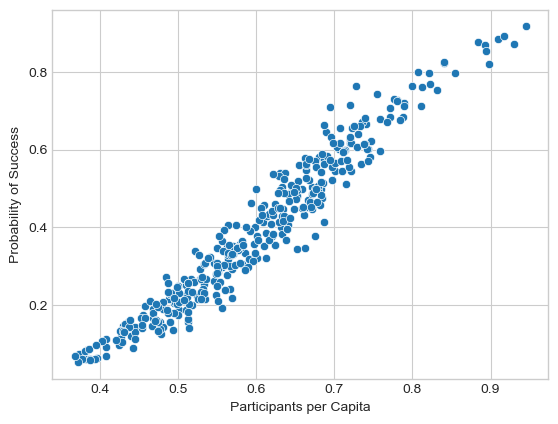

In [38]:
ax = sns.scatterplot(x='MEMPC', y=success_predicted, data=campaigns)
ax.set(xlabel='Participants per Capita', ylabel='Probability of Success')
plt.show()

* As demonstrated, the relationship between the probability of success and the participants per capita is a positive monotonic one. When the participants per capita increase, the probabibility of success tends to increase as well. 
* That implies that the higher the participants per capita of a campaign, the higher the possibility of a successful outcome
* Observing the plot, we may suppose that the relationship, except from being only monotonic, is also linear
* Since both variables are continuous, we use the Pearson correlation coefficient to validate our assumption

In [39]:
import scipy.stats

scipy.stats.pearsonr(campaigns.MEMPC, success_predicted.values)

PearsonRResult(statistic=0.9709108989810027, pvalue=9.177957994072893e-237)

* Definitely we are looking at a perfect positive linear correlation between the participants per capita and the probability of success

Moving on, we are asked to repeat the previous steps, but including only one independent variable, the participants per capita.

In [40]:
campaigns_simple_logit_mod = logit("SUCCESS ~ MEMPC", data=campaigns)
campaign_simple_logit_res = campaigns_simple_logit_mod.fit()
campaign_simple_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        23:54:18   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3469      0.709     -7.536      0.000      -6.737      -3.956
MEMPC          8.0495      1.141      7.052      0.000       5.812      10.287
==============================================================================
"""

In [41]:
success_simple_predicted = campaign_simple_logit_res.predict(campaigns['MEMPC'])

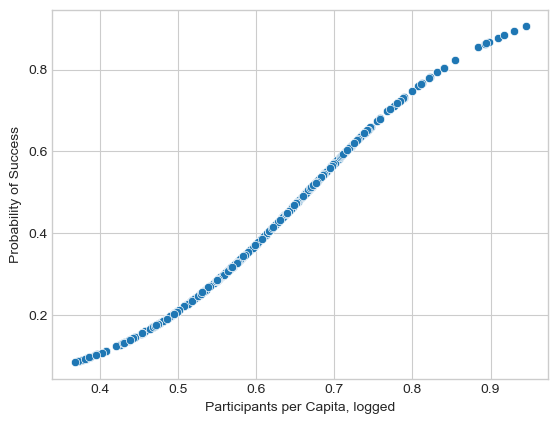

In [42]:
ax2 = sns.scatterplot(x='MEMPC', y=success_simple_predicted, data=campaigns)
ax2.set(xlabel='Participants per Capita, logged', ylabel='Probability of Success')
plt.show()

* The last plot presents the sigmoid pattern, representing the sigmoid function.
* It differntiates from the former one, since those two fit different components into the logistic regression model. 
* So, altering the model architecture and excluding the control variable from the second implementation, explains the visible differencies.
<br><br>
* Let's return to the previous model, with the two independent variables
* We can comprehend the difference, by drawing a scatter plot, showing the LNPOP, on the x axis, and the probability of success, on the y axis

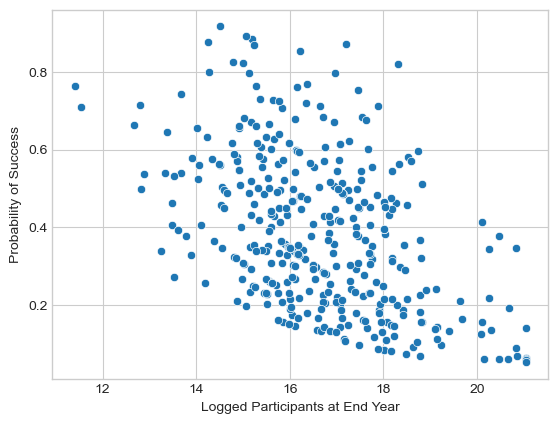

In [43]:
ax3 = sns.scatterplot(x='LNPOP', y=success_predicted, data=campaigns)
ax3.set(xlabel='Logged Participants at End Year', ylabel='Probability of Success')
plt.show()

* The diagram demonstrates high dispersion
* Given that the LNPOP affects (even lighlty) the logistic function, the multi-variable model cannot represent the sigmoid pattern perfectly, as done through the single-variable regression
* Why? As mentioned, when running a multi-variable regression, we must take into consideration that each and every predictor, more or less, has an impact on the outcomes of the logistic function

## The Level of Participation Tipping Point

* A famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success
* The “3.5% rule” refers to the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event
* The 3.5% figure is a descriptive statistic based on a sample of historical movements
* Exceptions like Bahrain in 2011-2014, may challenge the validity of the rule
* Moreover, other factors —momentum, organization, strategic leadership, and sustainability— are likely as important as large-scale participation in achieving movement success and are often precursors toachieving 3.5% participation
* We start by creating an indicative table

In [44]:
campaigns['PERCENTAGE POPULAR PARTICIPATION'] *=100

In [45]:
bins = [0, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, float('inf')]
bin_labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']
campaigns['Peak Popular Participation (%)'] = pd.cut(campaigns['PERCENTAGE POPULAR PARTICIPATION'], bins=bins, labels=bin_labels, include_lowest=True)

rule = campaigns.groupby('Peak Popular Participation (%)')['SUCCESS'].\
    agg(['count', 'mean']).reset_index().\
    sort_values(by='Peak Popular Participation (%)', ascending=False).\
    rename(columns={'count': 'Observations', 'mean': 'Success Rate'})

rule['Success Rate'] = rule['Success Rate'].apply(lambda x: "{:.2%}".format(x))

In [46]:
from IPython.display import display

rule = rule.reset_index(drop=True)

def center_alignment(val):
    return 'text-align: center;'

# Apply the style to the entire DataFrame
styled_df = rule.style.applymap(center_alignment)
display(styled_df)

,Peak Popular Participation (%),Observations,Success Rate
0,greater than 3.5%,18,88.89%
1,1.0% - 3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


Since we are asked to find the percentage of the population that is the tipping point for success in a campaign with 99% probability, we run a logistic regression of success on the percentage of the population that participated.

In [47]:
import statsmodels.api as sm
X = sm.add_constant(campaigns[['PERCENTAGE POPULAR PARTICIPATION']])
y = campaigns['SUCCESS']
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.614082
         Iterations 8


In [48]:
from scipy.optimize import minimize_scalar

# we define the logistic function
def logistic_function(x, beta0, beta1):
    return 1 / (1 + np.exp(-(beta0 + beta1 * x)))

# we define the objective function that we shall minimize
def objective_function(x, *args):
    beta0, beta1 = args
    return (logistic_function(x, beta0, beta1) - 0.99)**2

# pick up a guess
initial_guess = X['PERCENTAGE POPULAR PARTICIPATION'].mean()

# conduct optimization to find X for which P(Y=1) is closest to 0.99
optimal_x = minimize_scalar(objective_function, args=(result.params[0],\
        result.params[1]), bounds=(X['PERCENTAGE POPULAR PARTICIPATION'].\
        min(), X['PERCENTAGE POPULAR PARTICIPATION'].max()), method='bounded').x
optimal_x

9.655844885358192

Overall, reaching the 9.65% of the population, can be the tipping point to have at least a 99% possibility of succcess.

## Nonviolent Resistance and Target Regime

* We examine whether nonviolent resistance remains significant even if we control for the regime type
* Since the response variable is binomial, we run a logistic regression
* Our dependent / output variable will be the binary feature `SUCCESS`
* We make use of more than one independent variables / predictors:
    - NONVIOL,a dichotomous variable identifying that a campaign was primarily nonviolent during the observation.
    - A list of control variables
        - Polity V score of campaign target
        - Log of participation, and the
        - Location’s Logged Population the Year the Campaign ends
* At the moment, the majority of both dependent and independent features is already availbale, except from `Polity V score`
* We use another dataset, in order to fetch the aforementioned variable.
* Further information for the dataset can be found [here](https://www.systemicpeace.org/inscr/p5manualv2018.pdf)
* Make sure you have the [xlrd](https://xlrd.readthedocs.io/en/latest/) library installed, that allows us reading data and formatting information from Excel files in the historical .xls format

In [49]:
polity = pd.read_excel("data/polity.xls")
polity.sample(3)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
13586,0,3241845,324,SAR,Sardinia,1845,0,NaN,0,10,-10,-10.0,30.0,3,1,1,1,4,1,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7684,0,3251974,325,ITA,Italy,1974,0,NaN,10,0,10,10.0,26.0,3,3,4,7,5,5,8.0,7,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14500,0,7801985,780,SRI,Sri Lanka,1985,0,NaN,6,1,5,5.0,37.0,3,3,4,5,3,3,8.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* At first, we need to merge `campaigns` dataframe with `polity`, to gain access to the needed polity score
* However, by simply merging the dataframes and applying an inner join, we accept back a reduced number of records
* Why that happens?
* After a brief scanning of the data, it is clear that there are multiple inconsistencies between the geographic data
* For example, we can find `East Germany` within the `campaigns`dataset, whereas the same location is stored as `Germany East` within `polity` dataset
* There are plenty of techniques we could follow here
* One could use [jellyfish](https://pypi.org/project/jellyfish/) or [SequenceMatcher](https://docs.python.org/3/library/difflib.html#difflib.SequenceMatcher) from [difflib](https://docs.python.org/3/library/difflib.html)
* For the needs of the strings' matching we use [fuzzywuzzy](https://github.com/seatgeek/fuzzywuzzy) library
* We need to create a method that basically:
    - examines the similarity of each location of the `campaigns` dataframe with the countries registered in the `polity` dataframe
    - based on a certain threshold (acceptance criterion) we finally map the two locations

In [50]:
from fuzzywuzzy import process
def fuzzy_match(name, choices):
    # Get the best match and its similarity score
    match, score = process.extractOne(name, choices)
    
    # If the similarity score is above a certain threshold, consider it a match
    if score >= 80:  # You can adjust the threshold based on your needs
        return match
    else:
        return None

* Be patient here! It may take some time!

In [ ]:
choices = polity["country"].tolist()
campaigns["Mapped_Country"] = campaigns["LOCATION"].apply(lambda x: fuzzy_match(x, choices))

* We perform the merging operation afterwards

In [ ]:
# Merge DataFrames on the mapped column
campaigns_polity = pd.merge(campaigns, polity[['country','polity', 'polity2', 'year']],\
    left_on=['Mapped_Country', 'EYEAR'], right_on=['country', 'year'], how='inner')

* Proceeding, we fill NaN values found in the `polity2` variable, with the corresponding not NaN, that are available from the `polity` variable

In [ ]:
campaigns_polity['polity2'].fillna(campaigns_polity['polity'], inplace=True)

* We then run the logistic regression

In [ ]:
violence_regime_logit_mod = logit("SUCCESS ~ NONVIOL + polity2 + LMEMBERS + LNPOP",\
                                  data=campaigns_polity)
violence_regime_logit_res = violence_regime_logit_mod.fit()
violence_regime_logit_res.summary2()

Let's calculate the predictions!

In [ ]:
violence_regime_predicted = violence_regime_logit_res.\
    predict(campaigns_polity[['NONVIOL', 'polity2', 'LMEMBERS', 'LNPOP']])
violence_regime_predicted.sample(2)

In [ ]:
ax3 = sns.scatterplot(x='NONVIOL', y=violence_regime_predicted, data=campaigns_polity)
ax2.set(xlabel='Participants per Capita, logged', ylabel='Probability of Success')
plt.show()

* One unit of difference in the binomial variable `NONVIOL` informs us about switching from one category to the other.
* The results indicate that the `NONVIOL` is statistically significant ($p\textrm{-value} = 0.0034$)
* We can understand that, we can achieve higher probabilities of success, when the campaigns are non-violent. 